## Neural Network ANN classification using Keras
  
Deep learning is a branch of Machine Learning which uses different types of neural networks.  
  
Using the Sonar dataset, the project develops an ANN model to classify 60 sonar readings to 2 classes: Rocks and Mines.  

Python skills: Keras, Scikit-learn, deep learning neural networks  
  
  
Dataset: https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+%28Sonar%2C+Mines+vs.+Rocks%29

---

#### 1) Download libraries
  
  

In [3]:
import pandas as pd
import numpy as np
from keras import models
from keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

import pickle as pk

### 2) Data exploration

In [45]:
# Import the data using the file path
df = pd.read_csv('dataset_40_sonar.csv', sep=',')
df

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,Rock
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,Rock
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,Rock
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,Rock
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,Rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,Mine
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,Mine
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,Mine
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,Mine


### 3) Data Preparation, preprocessing

In [41]:
# split dataframe into x and y

y_data = df['Class']
x_data = df.drop('Class', axis=1)

In [42]:
# Standard Scaler: all features are numeric and continuous

numerical_data = x_data.select_dtypes(include=['float64', 'int64']).copy()
data_tmp = numerical_data.values #returns a numpy array

std_scaler = StandardScaler()
data_tmp = std_scaler.fit_transform(data_tmp)
numerical_data = pd.DataFrame(data_tmp, columns=numerical_data.columns)

x_data = numerical_data
x_col_name = x_data.columns
x_col_count = len(x_col_name)



In [43]:
# One hot encoding: for categorical target class

y_tmp = pd.DataFrame(y_data).values #returns a numpy array

y_scaler = OneHotEncoder(categories = "auto", 
                         sparse= False)
y_data = y_scaler.fit_transform(y_tmp)

# add column labels to y, and insert labels row ( visualisation)
y_data = pd.DataFrame(y_data, columns= ["Mine","Rock"])
y_dataguide =y_data.assign(labels=df["Class"].values)

print(x_data.shape)
y_dataguide

(208, 60)


,Mine,Rock,labels
0,0.0,1.0,Rock
1,0.0,1.0,Rock
2,0.0,1.0,Rock
3,0.0,1.0,Rock
4,0.0,1.0,Rock
...,...,...,...
203,1.0,0.0,Mine
204,1.0,0.0,Mine
205,1.0,0.0,Mine
206,1.0,0.0,Mine


### 4) train_test split, and creating the ANN model
We use an ANN model with 1 hidden layer and 1 output layer  
There are 5 major hyperparameters that we can use to tune the model,  
1) Epoch  
2) Batch size  
3) Layers  
4) Nodes  
5) Activation function  

In [58]:
# Split data into train-test sets
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3)


# add hidden layers, in the case just 1 hidden layer, 1 output layer 
# output later needs to be softmax, multiclass classification model

network = models.Sequential()
network.add(layers.Dense(128, activation='relu', input_shape=(x_col_count,)))
network.add(layers.Dense(2, activation='softmax'))
## JIMMY: The hidden layer should not be 'softmax' (-5 marks)

# Observe the use loss function in the codes below
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# Observe the setting of shuffle to True
# Play around the epochs, batch_size to see the effect 
# (Try to achieve <0.001 loss)

history= network.fit(X_train, y_train, validation_split=0.2, epochs=80, 
                     batch_size=24, verbose =0, shuffle= True)


test_loss, test_acc = network.evaluate(X_test, y_test)

print('test loss:', test_loss)
print('test accuracy:', test_acc)

63/63 [==============================] - 0s 64us/step
test loss: 0.6683687009508648
test accuracy: 0.8253968358039856


In [59]:
network.summary() # output shape (number of training data(which is batch size), nodes)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               7808      
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 258       
Total params: 8,066
Trainable params: 8,066
Non-trainable params: 0
_________________________________________________________________


### 5) Performance evaluation  
We use this to see if the model is sufficiently trained based on the data set and validation data and number of epoch.  
  
**Model loss plot:** We see best fit at around 12 epoch when both train and test data stop descending and start to diverge.

**Model accuracy plot:** Similarly at around 10-20 epoch, we see that accuracy improvement starts to flatten. 

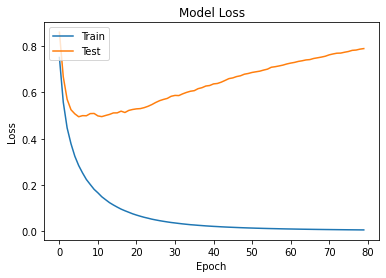

In [60]:
# loss plot, loss bottom around 0.4

import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

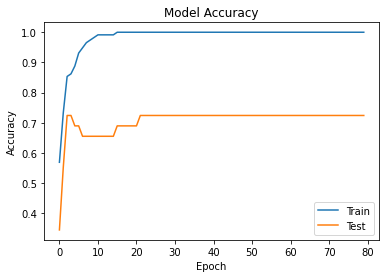

In [61]:
#accuracy plot, accuracy tends to peak around 80%

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

In [62]:
# save the model
pk.dump(history, open('model1.pkl', 'wb'))
# save the standard scaler
pk.dump(std_scaler, open('scaler1.pkl', 'wb'))
# save the one hot scaler
pk.dump(y_scaler, open('ohscaler1.pkl', 'wb'))
